In [79]:
import numpy as np

## 1 Preparation

### What is the purpose of an activation function in NN in general

First, let's quickly recap: Neural Networks are networks of neurons. Each neuron receives potentials from other neurons (or other sources, e.g. photoreceptors), which influence its own potential. This potential needs to reach a certain *threshold* to "fire" again, i.e. to send the signal forward. In general, the task of the *threshold* is to differentiate between *noise* and important *stimulus*.  
Conceptually, a neuron in an ANN serves the same purpose: *Sum up incoming information, decide whether the input is noise or stimulus and decide to fire*. This is all encompassed by the activation function. 

### What's the advantage of e.g. sigmoid over the step function (threshold function)

Step function: $$\sigma(x) := y = \begin{cases} 1\text{ for }x\geq 0 \\ 0 \text{ for } x < 0 \end{cases}$$  
(see sigmoid below)  
In a nut shell, while the step function is biologically motivated and simple to implement, the big disadvantage is that it's derivative is 0 everywhere. Since we need a derivative for our gradient descent approach to optimization, we should choose an activtion function that's derivative contains valuable information: A very popular alternative is the sigmoid function. Another advantage is that the sigmoid function also adheres to the *Universal Approximation Theorem*, which in summary just states that an MLP with one hidden layer can approximate any (real) function given enough neurons in this hidden layer. Neat. 

### What does sigmoid look like (the formula as well as the graph)?

Sigmoid: $$\sigma(x) = \frac{1}{1+e^{-x}}$$  
For Sigmoid-prime (derivative), see below. 
![sig.png](attachment:sig.png)

### What is the derivative of sigmoid 

$$\frac{d}{dx} \sigma=\sigma'(x) = \sigma(x)(1-\sigma(x))$$

In [80]:
# Super simple sigmoid, no error handling, using the already importet numpy exponent 
# function instead of loading the extra python math module. 
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [81]:
# Simply using the above definition of sigmoidprime and our priorly defined sigmoid function.
def sigmoidprime(x):
    return sigmoid(x)*(1-sigmoid(x))

## 2 Data set

In [82]:
data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype = np.float32) # permutate all posibilities
# Correct labels for all 5 logic tasks 
lab_and = np.array([0,0,0,1], dtype = np.float32)
lab_or = np.array([0,1,1,1], dtype = np.float32)
lab_notand = np.array([1,1,1,0], dtype = np.float32)
lab_notor = np.array([1,0,0,0], dtype = np.float32)
lab_xor = np.array([0,1,1,0], dtype = np.float32)

## 3 Perceptron 

In [83]:
# We will need to update our perceptron from last week a little bit. You can reuse a few parts from last time!

class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        
        ### YOUR CODE HERE ###
        # Initialize random weights and a random bias term. 
        # The weights with mean 0 and stddev 0.5.
        # The bias with mean 0 and stddev 0.05. Check 'np.random.normal()'.
        self.weights = np.random.normal(loc=0,scale=0.5,size=self.input_units)
        self.bias = np.random.normal(loc=0, scale=0.05, size=1)
        # Define the learning rate as 1.
        self.alpha = 1
        #######################
        
        # Further we will later need access to the input and drive of the neuron. 
        # We initialize variables to store it.
        self.inputs = 0
        self.drive = 0
        
    def forward_step(self, inputs):
        self.inputs = inputs
        ### YOUR CODE HERE ###
        # Calculate the drive and store it in the corresponding variable.
        self.drive = self.weights @ inputs + self.bias
        # Return the activation.
        return sigmoid(self.drive)
        ######################
        
    def update(self, delta):
        # We will call this function to update the parameters for this specific perceptron.
        # The function is provide with a delta. So you only need to compute the gradients 
        # perform the update.
        
        ### YOUR CODE HERE ###
        # Compute the gradients for weights and bias.
        gradient_weights = delta * self.inputs
        gradient_bias = delta
        # Update weights and bias.
        self.weights -=  self.alpha * gradient_weights
        self.bias -= self.alpha * gradient_bias
        #######################

## 5 Multi-Layer-Perceptron

In [84]:
# We can now build a multi-layer perceptron out of the previously defined perceptrons.
class MLP:
    
    def __init__(self):
        # Here we initialize the perceptrons for the hidden layer.
        self.hidden_layer = [
            Perceptron(input_units=2),
            Perceptron(input_units=2),
            Perceptron(input_units=2),
            Perceptron(input_units=2)
        ]
        # Initializing the output neuron.
        self.output_neuron = Perceptron(input_units=4)
        # Initializing a variable to store the output.
        self.output = 0
        
    def forward_step(self, inputs):
        ### YOUR CODE HERE ###
        # Compute the activations for the hidden layer.
        activations_hidden = np.array([p.forward_step(inputs) for p in self.hidden_layer])
        # You might need to reshape ((4,1)->(4,)) the resulting array to feed it to the output neuron. 
        # Check 'np.reshape(arr, newshape=(-1)).'
        activations_hidden = np.reshape(activations_hidden, newshape=(-1))
        # Compute the activation of the output neuron and store it in 'self.output'.
        self.output = self.output_neuron.forward_step(activations_hidden)
        ######################
        
    def backprop_step(self, inputs, target):
        # Use the Sum-squared error (lecture 3) as the loss function.
        ### YOUR CODE HERE ###
        # Compute the delta at the output neuron.
        output_delta = - (target - self.output) * sigmoidprime(self.output_neuron.drive)
        # Update the parameters of  the output neuron.
        self.output_neuron.update(output_delta)
        # Compute the deltas for the hidden neurons.
        hidden_deltas = [output_delta * sigmoidprime(p.drive) * self.output_neuron.weights[i] for i, p in enumerate(self.hidden_layer)]
        # Update the parameters for all four neurons in the hidden layer.
        for i,p in enumerate(self.hidden_layer):
            p.update(hidden_deltas[i])
        ######################

In [88]:
# Initialize the MLP.
mlp = MLP()
# Initialize lists to store epochs, loss, accuracy.
epochs=[]
losses=[]
accuracies=[]

for epoch in range(500):
    epochs.append(epoch)
    
    accuracy_buffer = 0
    loss_buffer = 0
    
    # Training loop.
    for i in range(4):
        x = data[i]
        t = lab_and[i]
        
        ### YOUR CODE HERE ###
        # Perform a forward step with the given sample.
        mlp.forward_step(x)
        # Perform a backpropagation step with the given sample and target.
        mlp.backprop_step(x,t)
        ######################
        
        accuracy_buffer += int(float(mlp.output>=0.5) == t)
        loss_buffer += (t-mlp.output)**2
        
    accuracies.append(accuracy_buffer/4.0)
    losses.append(loss_buffer)

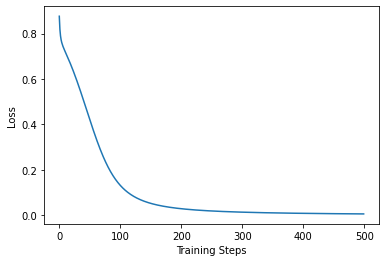

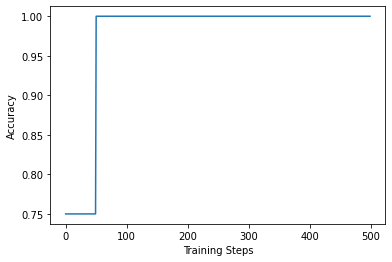

In [89]:
# Visualize the training progress. Loss and accuracy.
# If the performance does not reach 100% just rerun the cell above.
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
plt.figure()
plt.plot(epochs,losses)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(epochs,accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.show()
######################